<a href="https://colab.research.google.com/github/Saimadeveloper/Image_Classification.py/blob/main/image_classification_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import requests
from PIL import Image
from io import BytesIO

#  Cat Image URL
image_url = "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg"

# Image  download
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Image save
image.save("/content/cat.jpg")

# Image show
image.show()


In [15]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet

# Loading the pre-trained MobileNet model
model = MobileNet(weights="imagenet")


In [16]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Normalize
    return img_array


In [17]:
from tensorflow.keras.applications.mobilenet import decode_predictions

def classify_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)  # Model prediction

    decoded_predictions = decode_predictions(predictions, top=3)[0]  # Get top 3 results
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}: {label} ({score:.2f}%)")  # Print class and confidence


In [18]:
import matplotlib.pyplot as plt

def show_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)  # Show image
    plt.axis("off")  # Hide axes
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
Top Predictions:
1: Egyptian_cat (0.54%)
2: tiger_cat (0.39%)
3: tabby (0.04%)


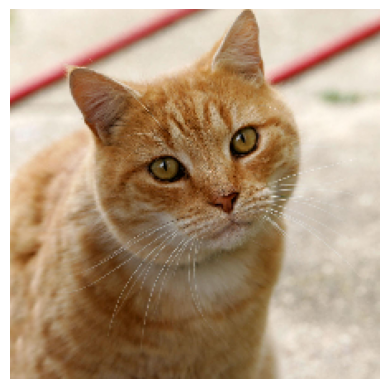

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Loading  Pre-trained MobileNet model
model = MobileNet(weights="imagenet")

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img("/content/cat.jpg"
, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to classify image
def classify_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Print predictions
    print("Top Predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}: {label} ({score:.2f}%)")

    # Show image
    img = image.load_img("/content/cat.jpg"
, target_size=(224, 224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

#  image path
image_path = "your_image.jpg"  # Change this to your image file path
classify_image(image_path)
